# Estudio de Rendimiento Backend en OPAR

En este estudio de rendimiento, evaluaremos el comportamiento del backend de la aplicación OPAR en dos áreas clave: **inmuebles** y **opiniones**. El apartado de inmuebles se centra en la capacidad del sistema para gestionar la carga de información detallada de cada propiedad disponible para alquiler. En cuanto a opiniones, se medirá el rendimiento en la recopilación, almacenamiento y recuperación de calificaciones y comentarios de los usuarios, asegurando que el sistema pueda ofrecer resultados rápidos y precisos al momento de consultar la reputación de un inmueble. El objetivo es garantizar una experiencia de usuario ágil y confiable, con tiempos de respuesta optimizados y una gestión eficiente de los datos en ambas secciones.

Pruebas realizadas para 12000 usuarios.

Repositorio del backend: [https://github.com/JulianCastillo14/OPAR-backend](https://github.com/JulianCastillo14/OPAR-backend)


### Integrantes:
- Juan Camilo Lozada Garavito – 2205560
- Jerson Julian Cañon Castillo – 2205633

### Cargamos las librerias

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Versión 1
En esta primera versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán dos contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API, y otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que ambos servicios interactúen de manera eficiente y escalable. 
<div style="margin-left: 200px;">
    <img src="./Multimedia/V1.png" alt="Diagrama versión 1" width="500px" height="220">
</div>


In [ ]:
data = pd.read_csv("./v1/añadir_inmueble_12000_graph_result.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-4,text,True,NaN,695,440,527,527,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
1,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-6,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
2,1733099201305,533,Añadir Inmueble,200,NaN,Thread Group 1-7,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
3,1733099201309,529,Añadir Inmueble,200,NaN,Thread Group 1-13,text,True,NaN,695,440,527,527,http://127.0.0.1:8081/api/inmuebles/agregar,529,0,0
4,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-3,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1


##### Al añadir un inmueble

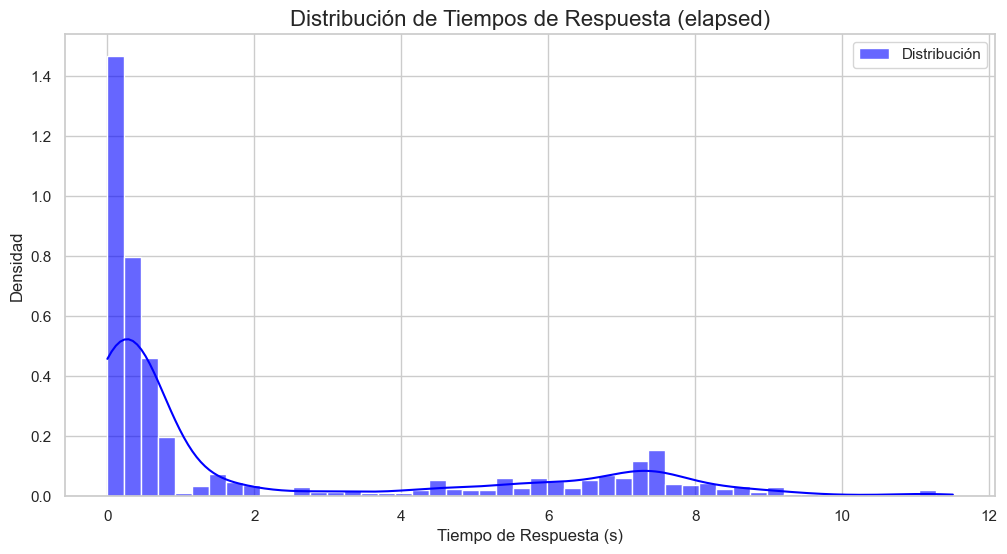

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- Podemos ver que el el tiempo más cómun de respuesta es de menos 1 segundo.
- La mayoria de los tiempos de respuesta son bajos, pero hay algunos tiempos de respuesta significativamente mayores.

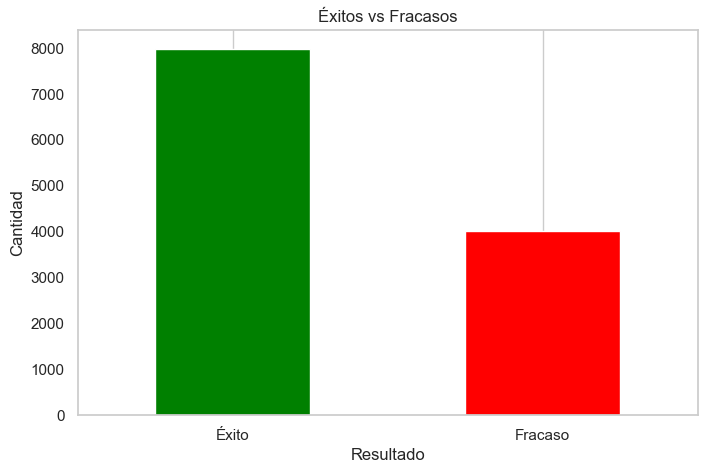

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 66% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

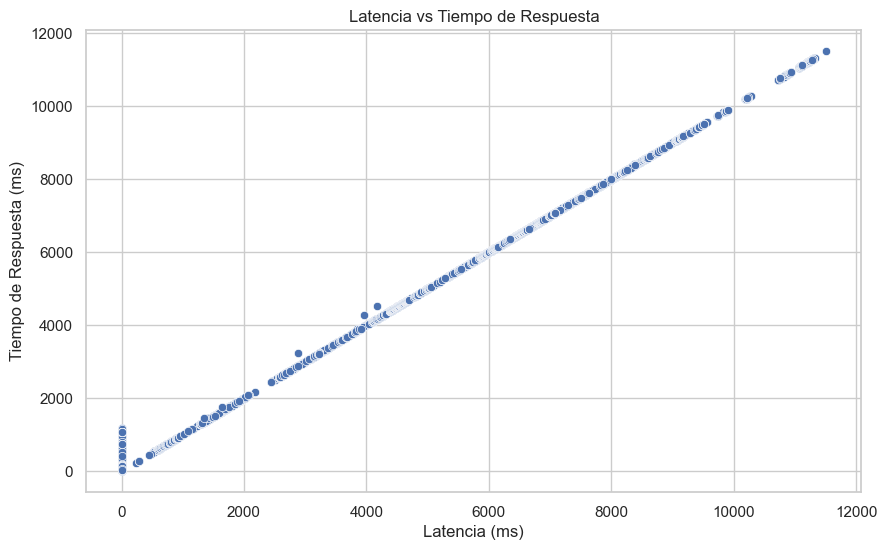

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [ ]:
data = pd.read_csv("./v1/añadir_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091472892,96,Añadir Opinion,200,NaN,Thread Group 1-3,text,True,NaN,660,375,59,59,http://127.0.0.1:8081/api/opiniones/agregar,96,0,1
1,1733091472891,106,Añadir Opinion,200,NaN,Thread Group 1-4,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,106,0,2
2,1733091472892,105,Añadir Opinion,200,NaN,Thread Group 1-9,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,105,0,1
3,1733091472893,104,Añadir Opinion,200,NaN,Thread Group 1-10,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,104,0,0
4,1733091472892,105,Añadir Opinion,200,NaN,Thread Group 1-1,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,105,0,1


#### Al añadir una opinión

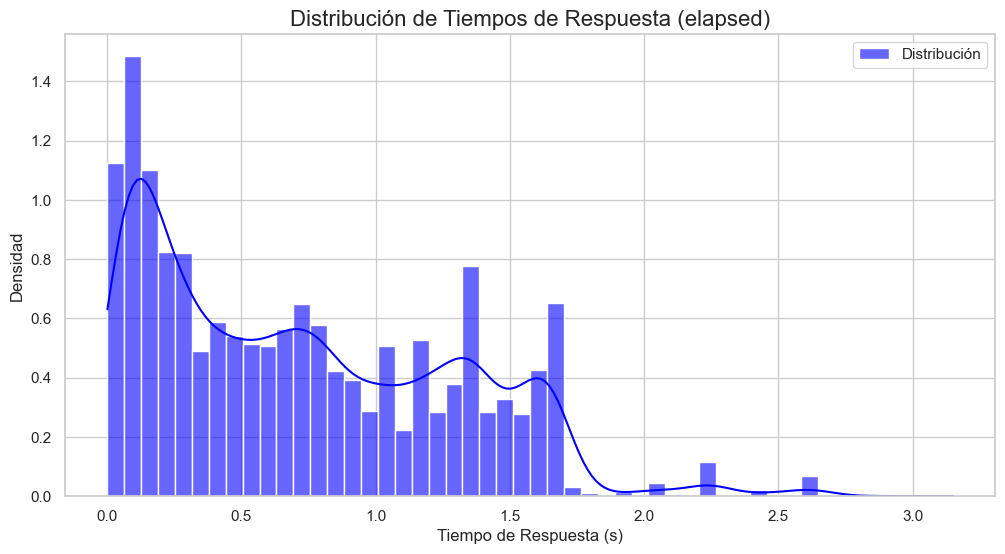

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- En el rango de 0 a 1.7 segundos hay una mayor densidad de tiempos de respuesta.
- Se observa una variabilidad en el rendimiento al tener varios valles.

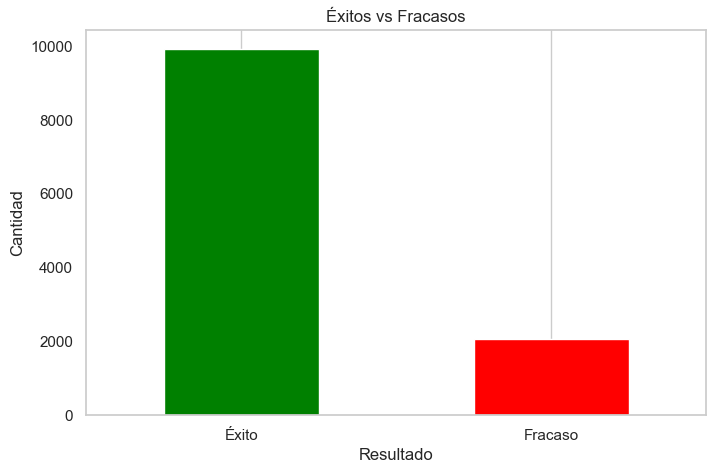

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 83% de las solicitudes están siendo procesadas correctamente.

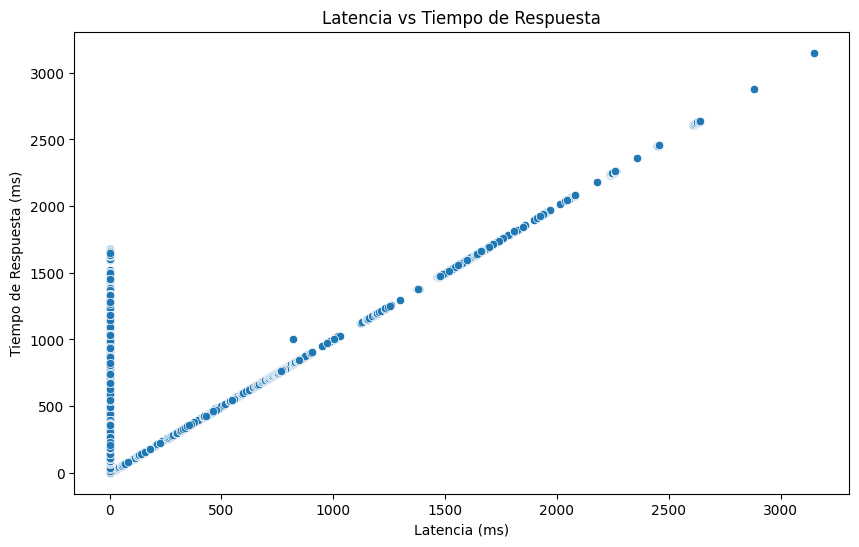

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1700ms aproximadamente.

In [ ]:
data = pd.read_csv("./v1/editar_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091315870,398,Editar Opinion,200,NaN,Thread Group 1-188,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,398,0,0
1,1733091315884,385,Editar Opinion,200,NaN,Thread Group 1-203,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,384,0,1
2,1733091315860,409,Editar Opinion,200,NaN,Thread Group 1-2548,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,408,0,0
3,1733091315872,397,Editar Opinion,200,NaN,Thread Group 1-190,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,397,0,0
4,1733091315876,394,Editar Opinion,200,NaN,Thread Group 1-194,text,True,NaN,1376,397,789,789,http://127.0.0.1:8081/api/opiniones/editar,393,0,1


#### Al editar una opinión

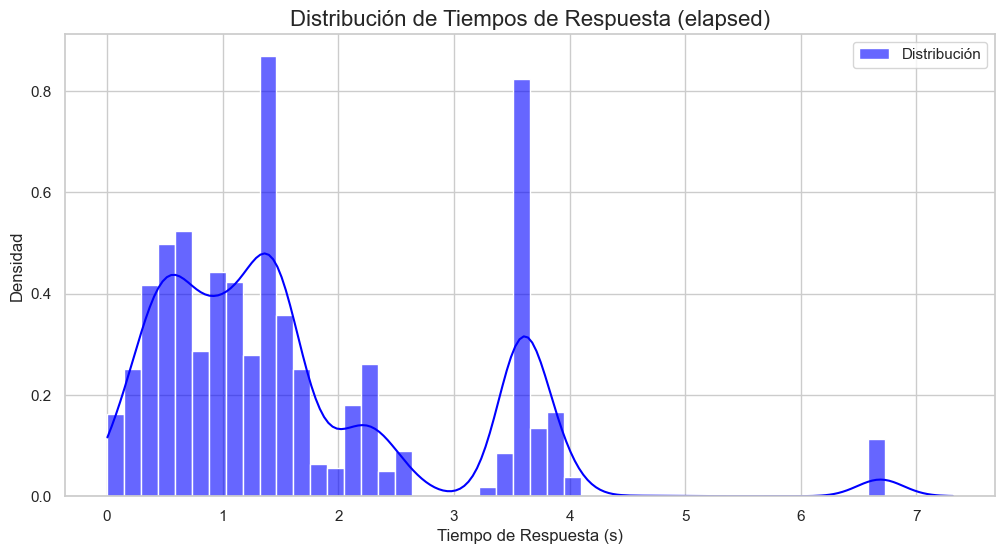

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- Se observa una variabilidad en el rendimiento al tener varios valles.
- Se tienen algunos valores atípicos cerca de los 7 segundos de respuesta.

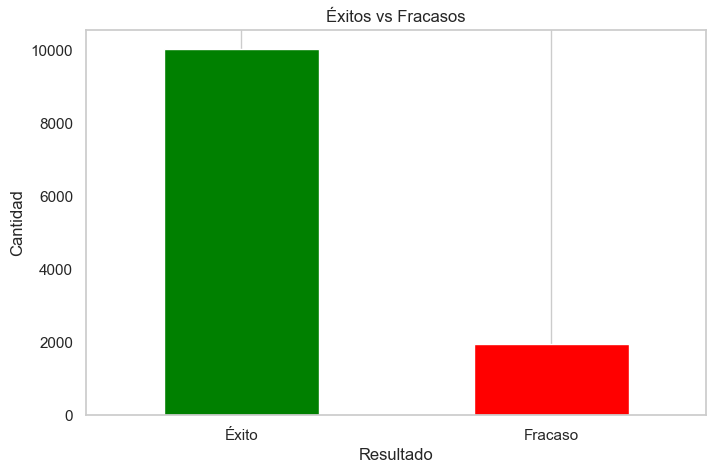

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 83% de las solicitudes están siendo procesadas correctamente.

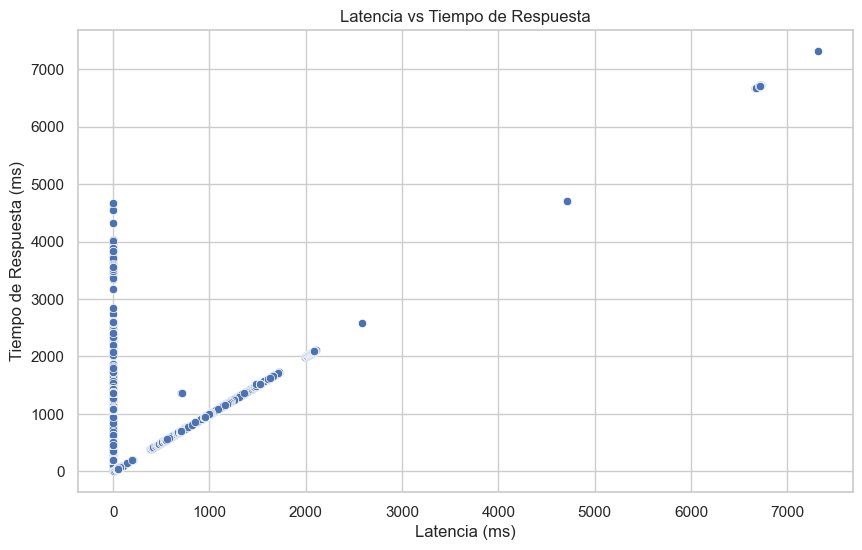

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

A pesar de la baja latencia, los tiempos de respuesta alcanzan los 5000 ms. Esto podría deberse a congestión en la red o sobrecarga del servidor, lo que afecta la experiencia del usuario. Sería necesario investigar posibles cuellos de botella y optimizar la infraestructura.

In [ ]:
data = pd.read_csv("./v1/listar_inmuebles_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733090960598,850,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-488,text,False,NaN,2595,0,2289,2289,http://127.0.0.1:8081/api/inmuebles/list,0,0,850
1,1733090961026,463,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1979,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,463
2,1733090960867,648,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1416,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,648
3,1733090960547,968,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-114,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,968
4,1733090960679,853,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-330,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,853


#### Al listar los inmuebles

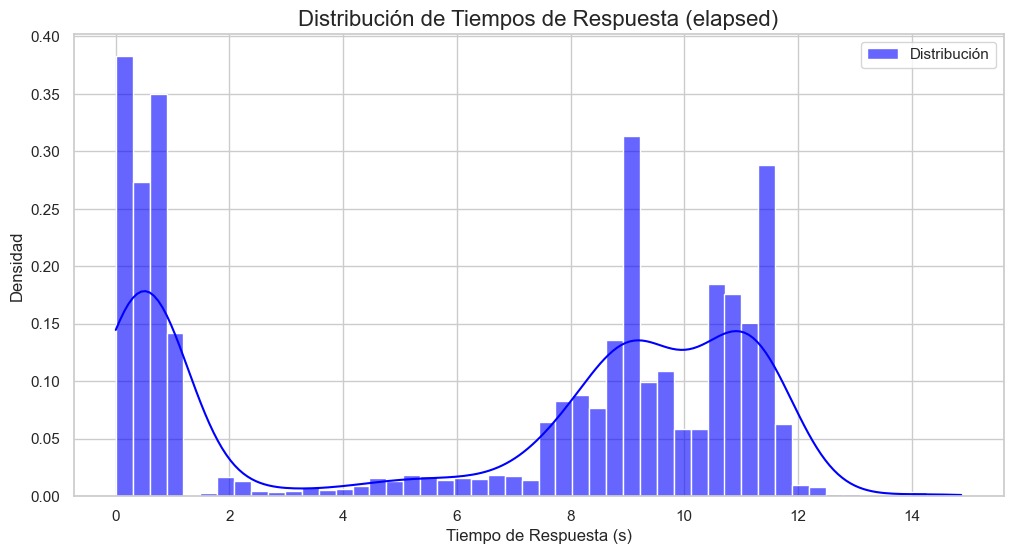

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

Se observa que el tiempo de respuesta aumenta significativamente llegando a tardar hasta 12 segundos en dar una respuesta indicando problemas en el rendimiento a la hora de querer obtener los inmuebles.

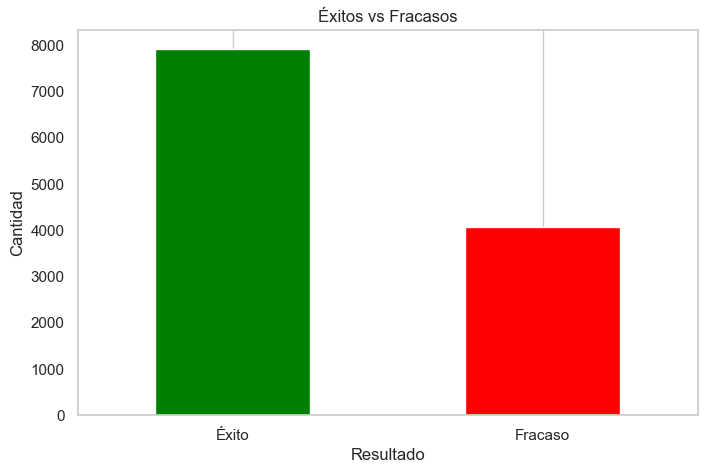

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 66% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando

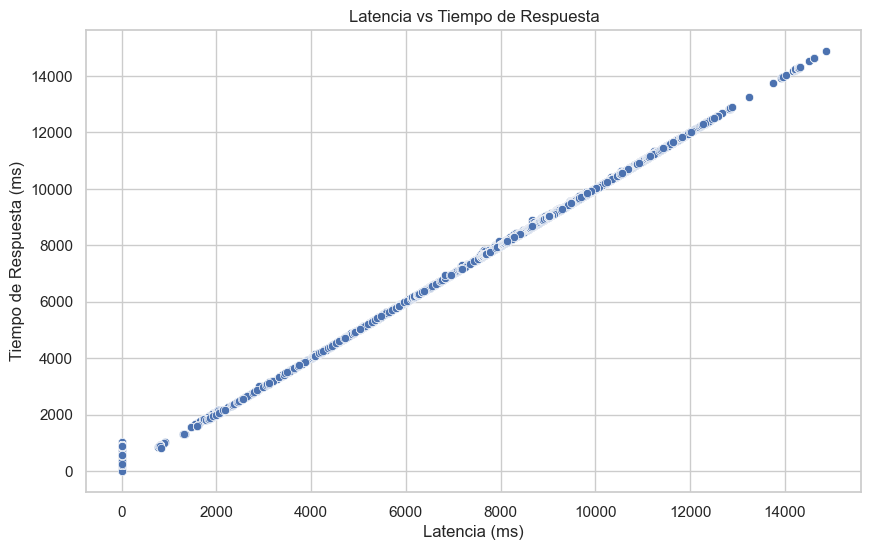

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [ ]:
data = pd.read_csv("./v1/lista_opinion_inmueble_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091108256,478,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-4195,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,246
1,1733091107556,1178,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1524,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,946
2,1733091107582,1154,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-744,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,921
3,1733091107565,1171,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1600,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,939
4,1733091107859,877,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-2645,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,646


#### Al listar las opiniones de un inmueble

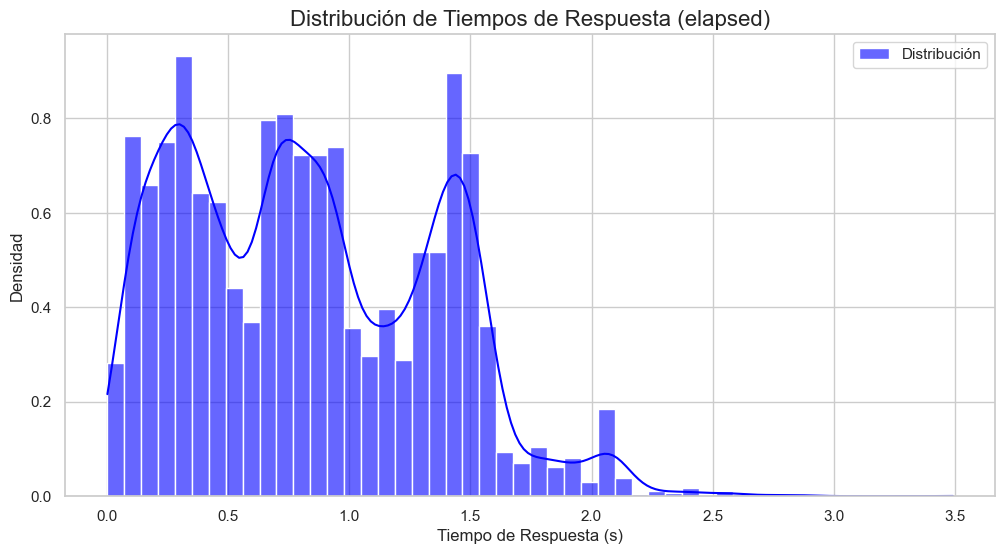

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

- Se observan algunos tiempos comunes de respuesta como 0.25s, 0.75s y 1.4s.
- También se tiene una variabilidad en los tiempos de respuesta al haber varios valles.

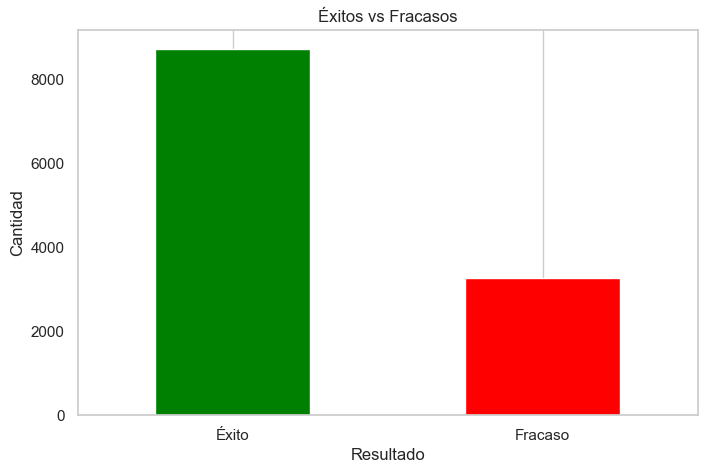

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 75% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

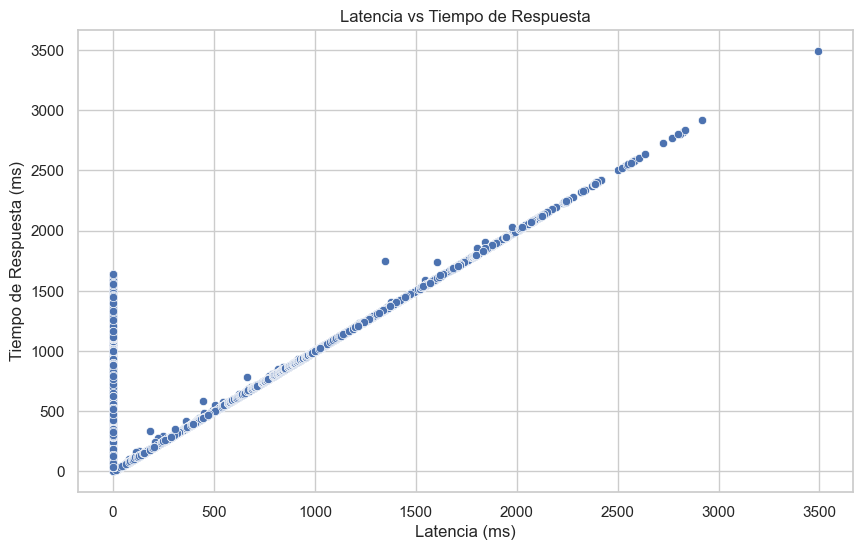

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1600ms aproximadamente.

In [ ]:
data = pd.read_csv("./v1/lista_opinion_usuario_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091237920,488,Obtener Opinion por Usuario,200,NaN,Thread Group 1-8,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,488,0,0
1,1733091237922,485,Obtener Opinion por Usuario,200,NaN,Thread Group 1-9,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,485,0,1
2,1733091237941,466,Obtener Opinion por Usuario,200,NaN,Thread Group 1-35,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,466,0,1
3,1733091237918,489,Obtener Opinion por Usuario,200,NaN,Thread Group 1-3,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,489,0,0
4,1733091237954,457,Obtener Opinion por Usuario,200,NaN,Thread Group 1-55,NaN,True,NaN,210,250,1142,1142,http://127.0.0.1:8081/api/opiniones/usuario,457,0,0


#### Al listar las opiniones realizadas por un usuario

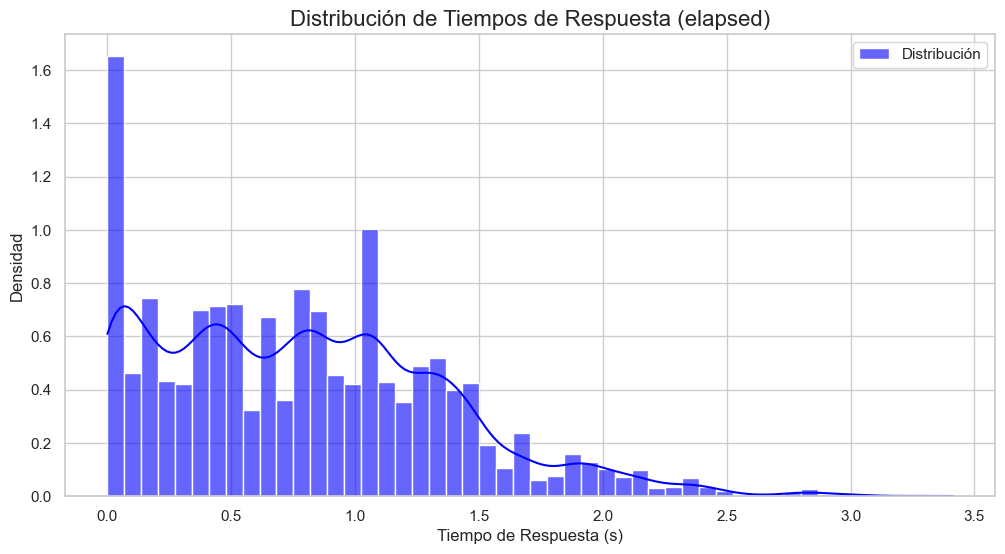

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

La mayor parte de las peticiones se están respondiendo de 0 a 1.5 segundos, sin embargo, algunas tardan más indicando problemas de rendimiento.


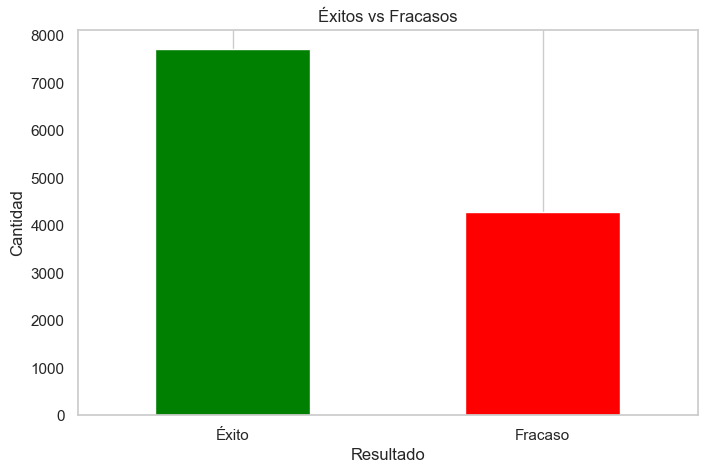

In [ ]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 62% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

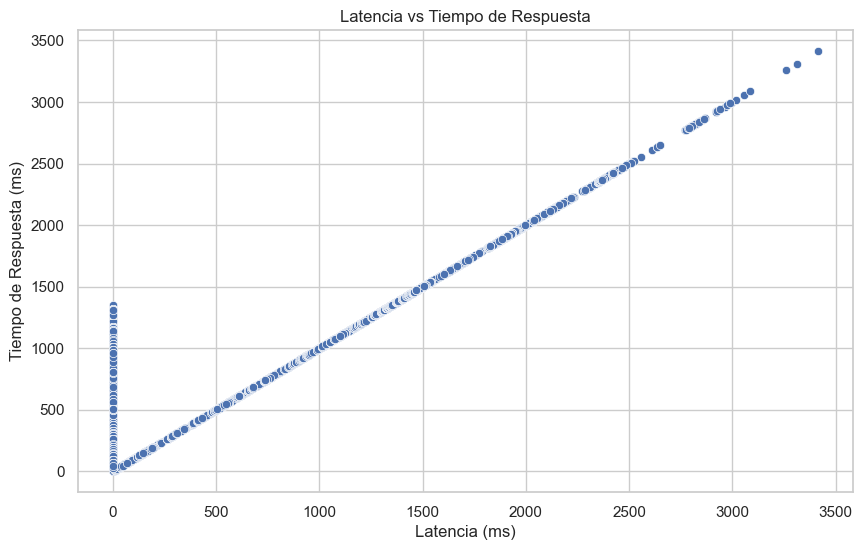

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1400ms aproximadamente.


## Versión 2

En esta segunda versión del backend, se implementará un despliegue utilizando Kubernetes con una única réplica. Esta arquitectura permitirá evaluar el comportamiento del backend en un entorno orquestado, donde el servicio se ejecutará como un pod administrado por Kubernetes. Además, se configurará un despliegue que incluya tanto el backend como la base de datos, garantizando su interacción a través de servicios internos de Kubernetes. El objetivo principal es validar la estabilidad y funcionalidad del backend al ser desplegado en Kubernetes, asegurando una comunicación eficiente entre los componentes y preparando el sistema para futuras expansiones escalables.

<div style="margin-left: 200px;">
    <img src="./Multimedia/V2.jpg" alt="Diagrama versión 2" width="500px" height="220">
</div>

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_añadir_inmueble_v2 = pd.read_csv('./v2/Añadir_Inmueble/añadir_inmueble_12000_graph_result.csv')
data_listar_inmueble_v2 = pd.read_csv('./v2/Lista_Inmuebles/listar_inmuebles_12000_graph_result.csv')
data_listar_opinion_usuario_v2 = pd.read_csv('./v2/Lista_Opiniones_Usuario/lista_opinion_usuario_12000_graph_result.csv')
data_añadir_opinion_v2 = pd.read_csv('./v2/Añadir_Opinion/añadir_opinion_12000_graph_result.csv')
data_editar_opinion_v2 = pd.read_csv('./v2/Editar_Opinion/editar_opinion_12000_graph_result.csv')
data_lista_opinion_inmueble_v2 = pd.read_csv('./v2/Lista_Opiniones_Inmueble/lista_opinion_inmueble_12000_graph_result.csv')

In [312]:
data_combined_v2 = pd.concat([data_añadir_inmueble_v2, 
                          data_listar_inmueble_v2, 
                          data_lista_opinion_inmueble_v2,
                          data_listar_opinion_usuario_v2,
                          data_añadir_opinion_v2,
                          data_editar_opinion_v2])

In [313]:
data_combined_v2['success'] = data_combined_v2['success'].apply(lambda x: 'Exitoso' if x == True else 'Fallido')
data_combined_v2['elapsed'] = data_combined_v2['elapsed'].apply(lambda x: x/1000)
data_combined_v2['timeStamp'] = pd.to_datetime(data_combined_v2['timeStamp'], unit='ms')
data_combined_v2

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,2024-12-01 20:42:30.539,0.734,Añadir Inmueble,200,NaN,Thread Group 1-121,text,Exitoso,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,733,0,0
1,2024-12-01 20:42:30.604,0.670,Añadir Inmueble,200,NaN,Thread Group 1-138,text,Exitoso,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,670,0,0
2,2024-12-01 20:42:30.579,0.695,Añadir Inmueble,200,NaN,Thread Group 1-142,text,Exitoso,NaN,695,441,614,614,http://localhost:30200/api/inmuebles/agregar,695,0,1
3,2024-12-01 20:42:30.587,0.688,Añadir Inmueble,200,NaN,Thread Group 1-28,text,Exitoso,NaN,695,441,612,612,http://localhost:30200/api/inmuebles/agregar,685,0,0
4,2024-12-01 20:42:30.576,0.699,Añadir Inmueble,200,NaN,Thread Group 1-44,text,Exitoso,NaN,695,441,611,611,http://localhost:30200/api/inmuebles/agregar,698,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2024-12-01 21:14:12.747,0.004,Editar Opinion,200,NaN,Thread Group 1-11997,text,Exitoso,NaN,1302,401,4,4,http://localhost:30200/api/opiniones/editar,4,0,0
11996,2024-12-01 21:14:12.746,0.005,Editar Opinion,200,NaN,Thread Group 1-11998,text,Exitoso,NaN,1302,401,4,4,http://localhost:30200/api/opiniones/editar,5,0,1
11997,2024-12-01 21:14:12.747,0.004,Editar Opinion,200,NaN,Thread Group 1-11996,text,Exitoso,NaN,1302,401,5,5,http://localhost:30200/api/opiniones/editar,4,0,0
11998,2024-12-01 21:14:12.747,0.005,Editar Opinion,200,NaN,Thread Group 1-11999,text,Exitoso,NaN,1302,401,2,2,http://localhost:30200/api/opiniones/editar,5,0,1


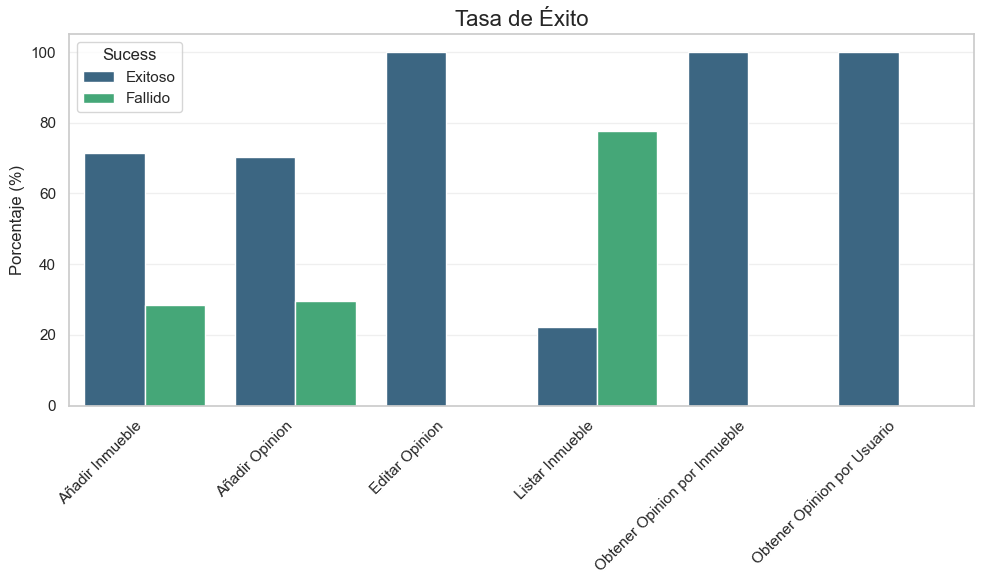

In [314]:
success_rates = data_combined_v2.groupby(['label', 'success']).size().reset_index(name='count')
success_rates['percentage'] = success_rates.groupby('label')['count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(data=success_rates, x='label', y='percentage', hue='success', palette='viridis')
plt.title('Tasa de Éxito', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('', fontsize=0)
plt.legend(title='Sucess')
plt.grid(alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


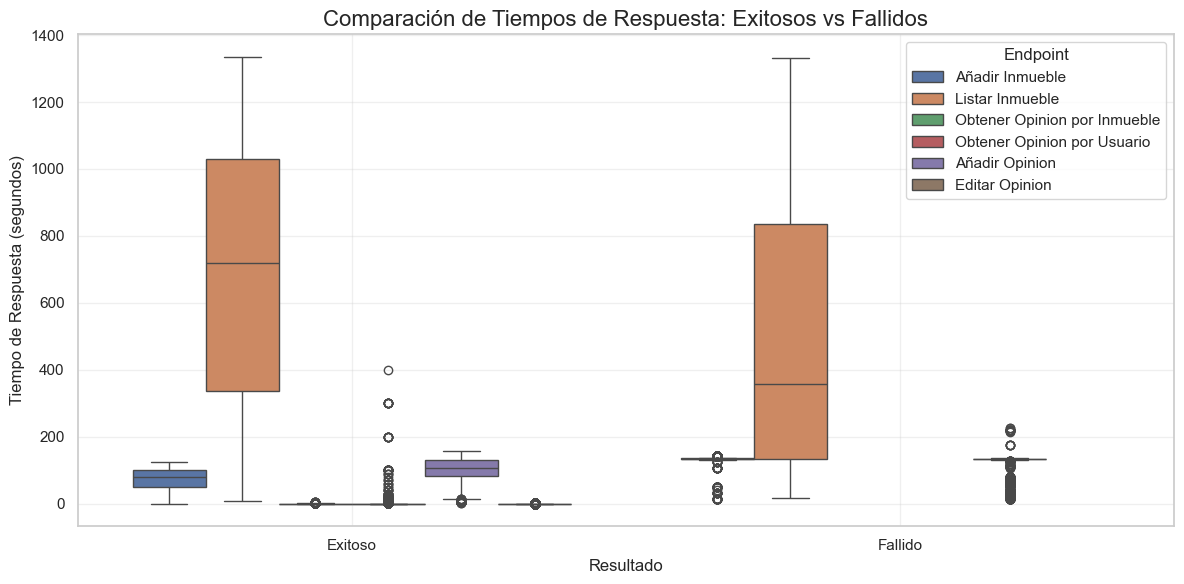

In [315]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='success', y='elapsed', hue='label', data=data_combined_v2)
plt.title('Comparación de Tiempos de Respuesta: Exitosos vs Fallidos', fontsize=16)
plt.xlabel('Resultado', fontsize=12)
plt.ylabel('Tiempo de Respuesta (segundos)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Endpoint")
plt.tight_layout()
plt.show()

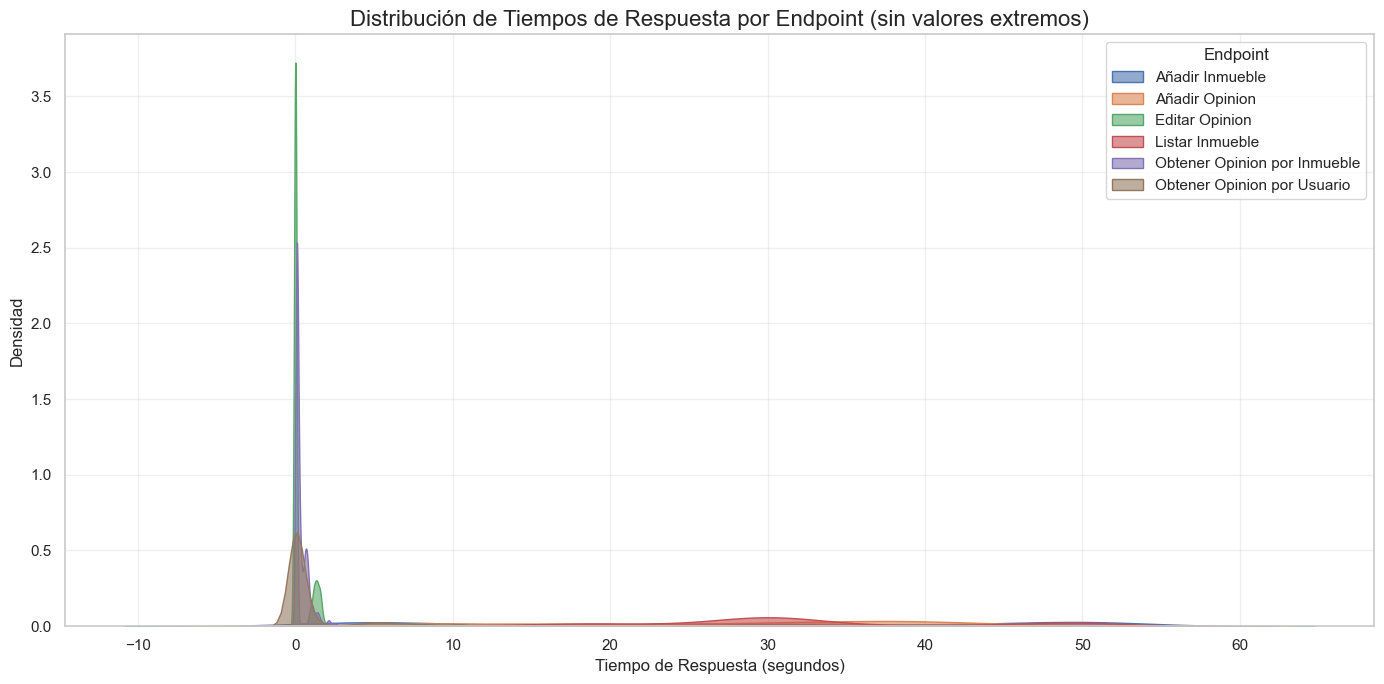

In [316]:
plt.figure(figsize=(14, 7))

filtered_data = data_combined_v2[data_combined_v2['elapsed'] <= data_combined_v2['elapsed'].quantile(0.55)]

for label, group in filtered_data.groupby('label'):
    sns.kdeplot(group['elapsed'], fill=True, label=label, alpha=0.6)

plt.title('Distribución de Tiempos de Respuesta por Endpoint (sin valores extremos)', fontsize=16)
plt.xlabel('Tiempo de Respuesta (segundos)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Endpoint')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

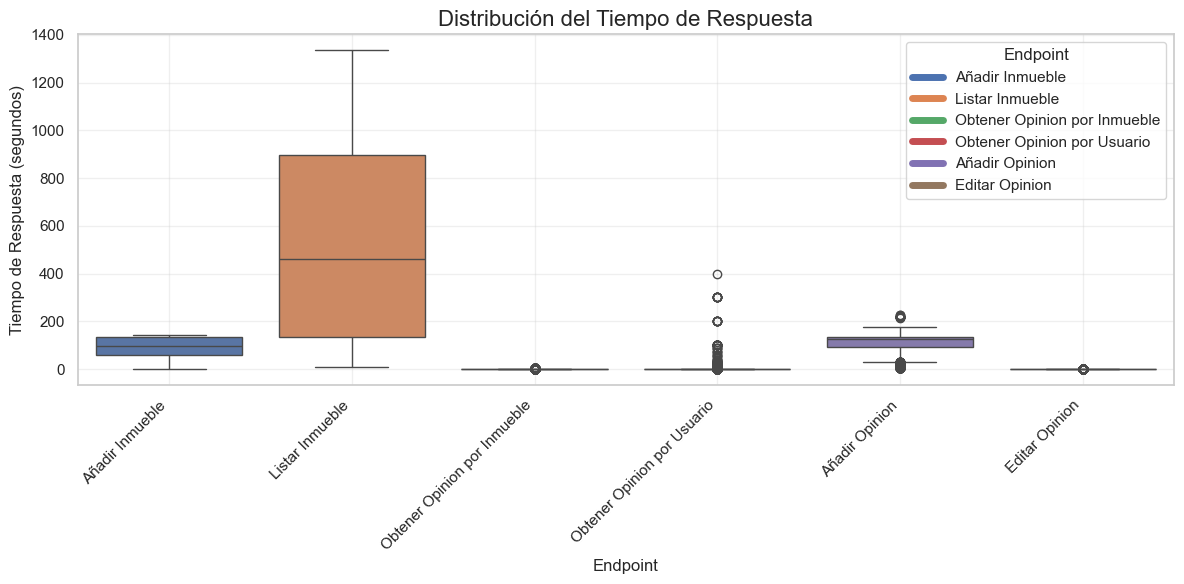

In [317]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_combined_v2, x='label', y='elapsed', hue='label')
plt.title('Distribución del Tiempo de Respuesta', fontsize=16)
plt.xlabel('Endpoint', fontsize=12)
plt.ylabel('Tiempo de Respuesta (segundos)', fontsize=12)

unique_labels = data_combined_v2['label'].unique()
handles = [plt.Line2D([0], [0], color=sns.color_palette()[i], lw=5) for i in range(len(unique_labels))]
plt.legend(handles, unique_labels, title="Endpoint", loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Versión 3
En esta tercera versión del backend, se implementará un despliegue en Kubernetes utilizando una única réplica. Este entorno permitirá aprovechar las capacidades de orquestación y gestión avanzada de Kubernetes. Además, se integrará un sistema de monitoreo basado en Prometheus, para recopilar métricas detalladas del rendimiento y el estado del backend y la base de datos. Para complementar, se configurará Grafana como herramienta de visualización, facilitando el análisis en tiempo real de las métricas recopiladas. El objetivo es evaluar la estabilidad del backend en un entorno con sistema de monitoreo y ver si su rendimiento se ve afectado de está manera y establecer la base para un escalamiento progresivo.

<div style="margin-left: 200px;">
    <img src="./Multimedia/V3.jpg" alt="Diagrama versión 4" width="500px" height="220">
</div>

In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_añadir_inmueble_v3 = pd.read_csv('./v3/Añadir_Inmueble/añadir_inmueble_12000_graph_result.csv')
data_listar_inmueble_v3 = pd.read_csv('./v3/Lista_Inmuebles/listar_inmuebles_12000_graph_result.csv')
data_listar_opinion_usuario_v3 = pd.read_csv('./v3/Lista_Opiniones_Usuario/lista_opinion_usuario_12000_graph_result.csv')
data_añadir_opinion_v3 = pd.read_csv('./v3/Añadir_Opinion/añadir_opinion_12000_graph_result.csv')
data_editar_opinion_v3 = pd.read_csv('./v3/Editar_Opinion/editar_opinion_12000_graph_result.csv')
data_lista_opinion_inmueble_v3 = pd.read_csv('./v3/Lista_Opiniones_Inmueble/lista_opinion_inmueble_12000_graph_result.csv')

In [319]:
data_combined_v3 = pd.concat([data_añadir_inmueble_v3, 
                          data_listar_inmueble_v3, 
                          data_lista_opinion_inmueble_v3,
                          data_listar_opinion_usuario_v3,
                          data_añadir_opinion_v3,
                          data_editar_opinion_v3])

In [320]:
data_combined_v3['success'] = data_combined_v3['success'].apply(lambda x: 'Exitoso' if x == True else 'Fallido')
data_combined_v3['elapsed'] = data_combined_v3['elapsed'].apply(lambda x: x/1000)
data_combined_v3['timeStamp'] = pd.to_datetime(data_combined_v3['timeStamp'], unit='ms')
data_combined_v3

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,2024-12-01 17:21:03.813,0.185,Añadir Inmueble,200,NaN,Thread Group 1-11,text,Exitoso,NaN,695,441,69,69,http://localhost:30200/api/inmuebles/agregar,183,0,1
1,2024-12-01 17:21:03.819,0.209,Añadir Inmueble,200,NaN,Thread Group 1-16,text,Exitoso,NaN,695,441,74,74,http://localhost:30200/api/inmuebles/agregar,209,0,1
2,2024-12-01 17:21:03.827,0.202,Añadir Inmueble,200,NaN,Thread Group 1-18,text,Exitoso,NaN,695,441,74,74,http://localhost:30200/api/inmuebles/agregar,201,0,2
3,2024-12-01 17:21:03.826,0.205,Añadir Inmueble,200,NaN,Thread Group 1-19,text,Exitoso,NaN,695,441,72,72,http://localhost:30200/api/inmuebles/agregar,204,0,1
4,2024-12-01 17:21:03.819,0.209,Añadir Inmueble,200,NaN,Thread Group 1-13,text,Exitoso,NaN,695,441,74,74,http://localhost:30200/api/inmuebles/agregar,209,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2024-12-01 18:10:23.356,0.004,Editar Opinion,200,NaN,Thread Group 1-11996,text,Exitoso,NaN,1299,398,5,5,http://localhost:30200/api/opiniones/editar,4,0,0
11996,2024-12-01 18:10:23.357,0.004,Editar Opinion,200,NaN,Thread Group 1-11997,text,Exitoso,NaN,1299,398,4,4,http://localhost:30200/api/opiniones/editar,4,0,1
11997,2024-12-01 18:10:23.358,0.003,Editar Opinion,200,NaN,Thread Group 1-11999,text,Exitoso,NaN,1299,398,3,3,http://localhost:30200/api/opiniones/editar,3,0,1
11998,2024-12-01 18:10:23.359,0.003,Editar Opinion,200,NaN,Thread Group 1-12000,text,Exitoso,NaN,1299,398,2,2,http://localhost:30200/api/opiniones/editar,3,0,0


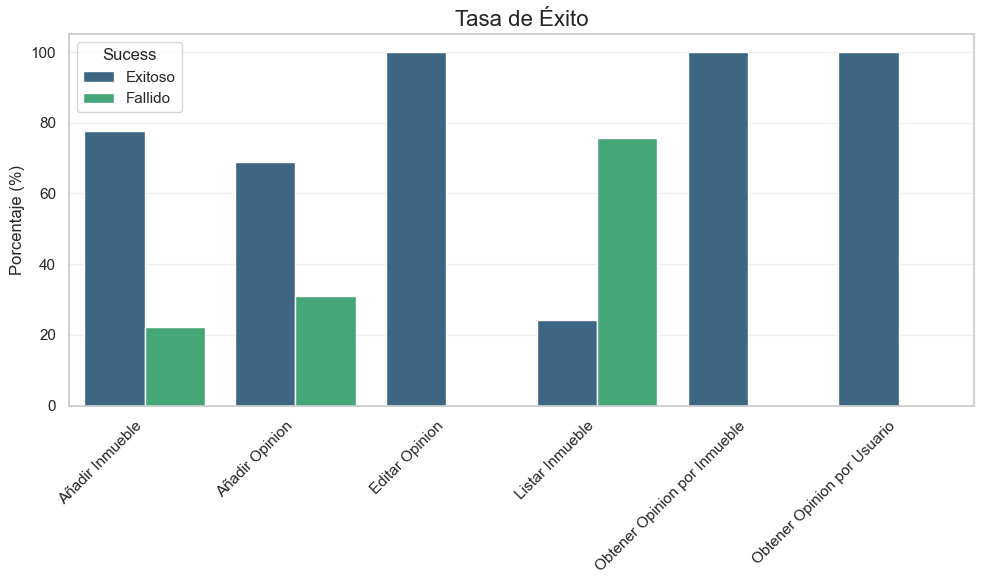

In [321]:
success_rates = data_combined_v3.groupby(['label', 'success']).size().reset_index(name='count')
success_rates['percentage'] = success_rates.groupby('label')['count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10, 6))
sns.barplot(data=success_rates, x='label', y='percentage', hue='success', palette='viridis')
plt.title('Tasa de Éxito', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('', fontsize=0)
plt.legend(title='Sucess')
plt.grid(alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


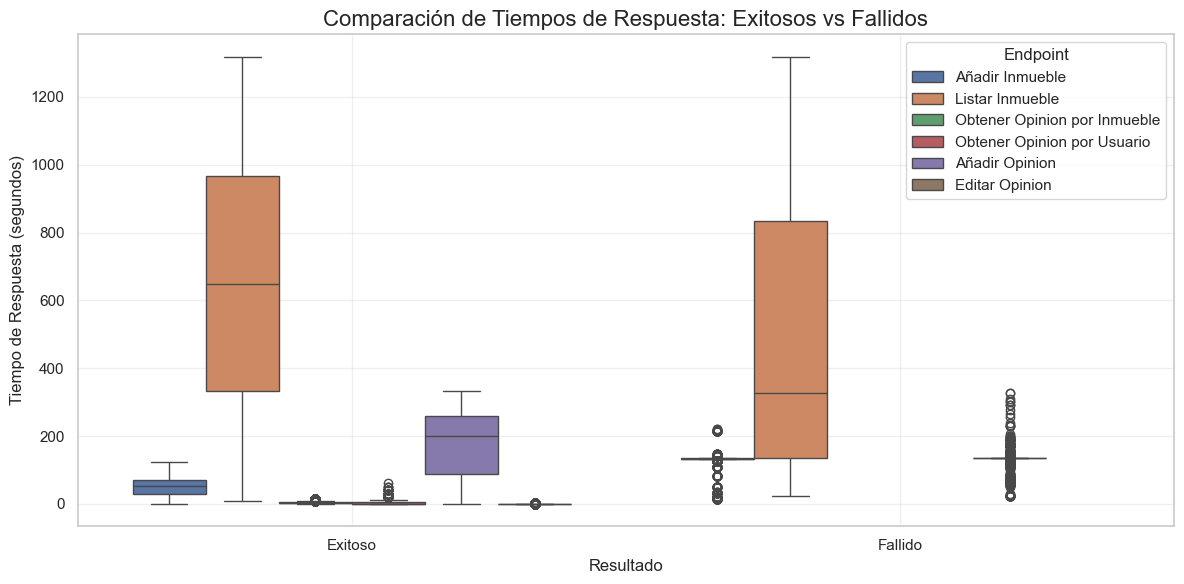

In [322]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='success', y='elapsed', hue='label', data=data_combined_v3)
plt.title('Comparación de Tiempos de Respuesta: Exitosos vs Fallidos', fontsize=16)
plt.xlabel('Resultado', fontsize=12)
plt.ylabel('Tiempo de Respuesta (segundos)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Endpoint")
plt.tight_layout()
plt.show()

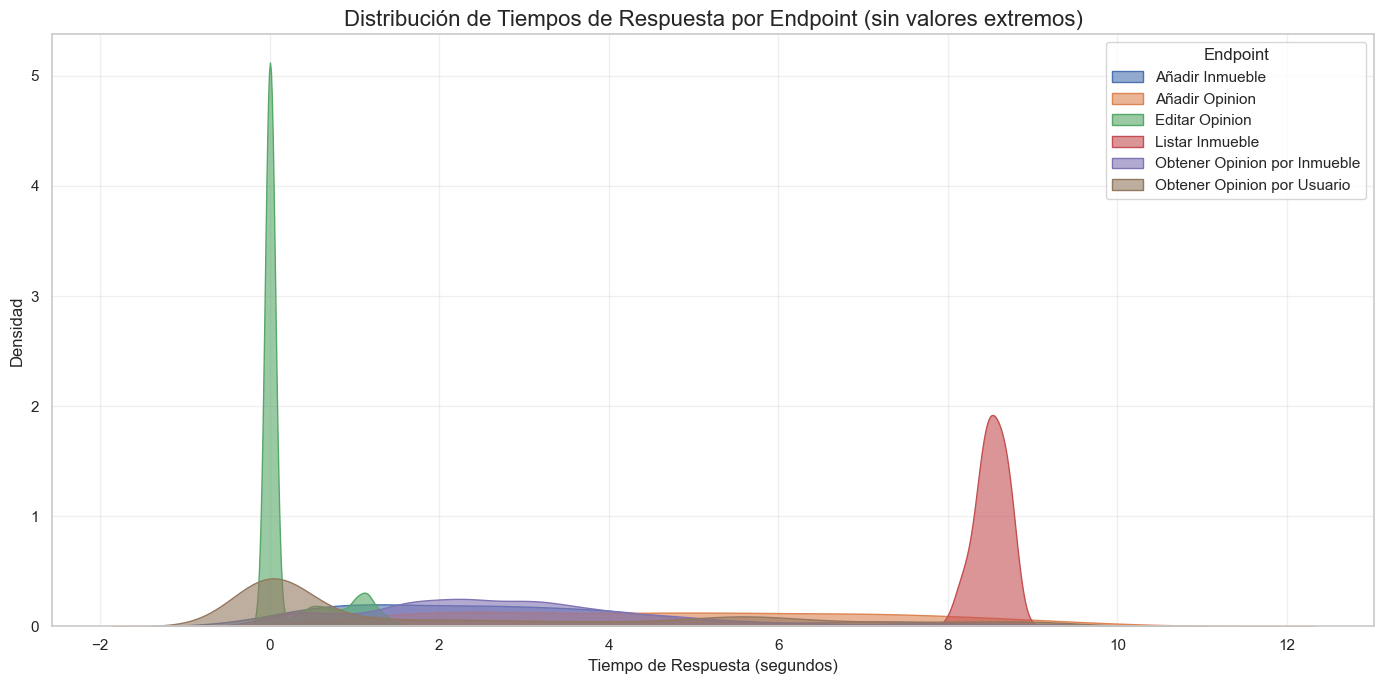

In [323]:
plt.figure(figsize=(14, 7))

filtered_data = data_combined_v3[data_combined_v3['elapsed'] <= data_combined_v3['elapsed'].quantile(0.48)]

for label, group in filtered_data.groupby('label'):
    sns.kdeplot(group['elapsed'], fill=True, label=label, alpha=0.6)

plt.title('Distribución de Tiempos de Respuesta por Endpoint (sin valores extremos)', fontsize=16)
plt.xlabel('Tiempo de Respuesta (segundos)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Endpoint')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

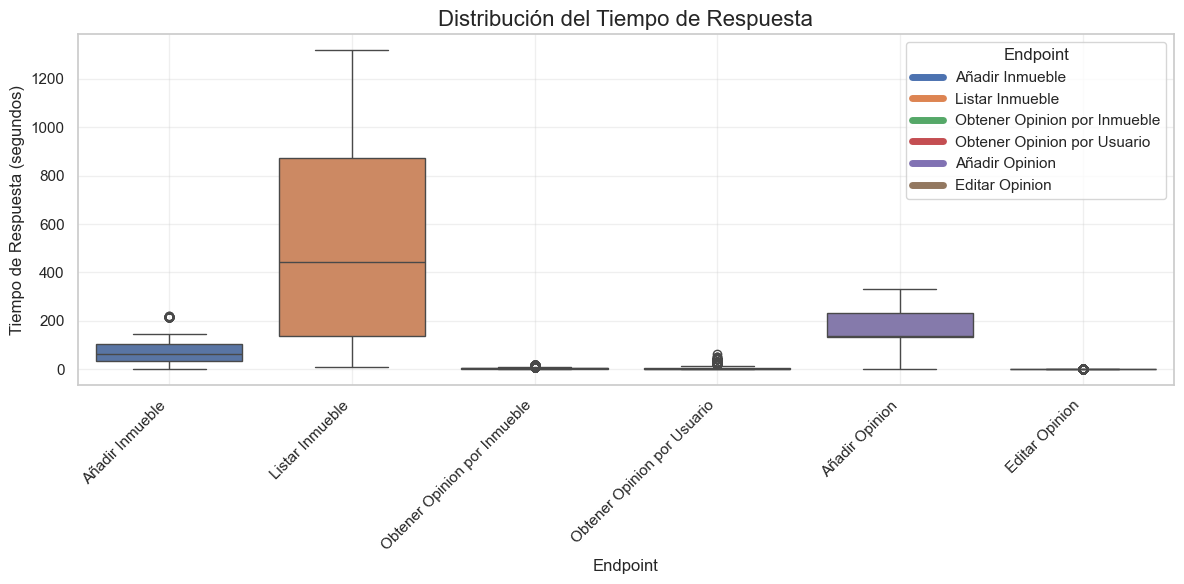

In [324]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_combined_v3, x='label', y='elapsed', hue='label')
plt.title('Distribución del Tiempo de Respuesta', fontsize=16)
plt.xlabel('Endpoint', fontsize=12)
plt.ylabel('Tiempo de Respuesta (segundos)', fontsize=12)

unique_labels = data_combined_v3['label'].unique()
handles = [plt.Line2D([0], [0], color=sns.color_palette()[i], lw=5) for i in range(len(unique_labels))]
plt.legend(handles, unique_labels, title="Endpoint", loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Versión 4

En esta cuarta versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán cuatro contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API; otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios; uno más para Prometheus, que se encargará del monitoreo del rendimiento del backend; y un último contenedor para Grafana, que se utilizará para la visualización de los datos recopilados por Prometheus. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que todos los servicios interactúen de manera eficiente, escalable y con una adecuada visualización de métricas de rendimiento.


<div style="margin-left: 200px;">
    <img src="./Multimedia/V4.jpg" alt="Diagrama versión 1" width="500px" height="420">
</div>

In [ ]:
data = pd.read_csv("./v4/añadir_inmueble_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733087676264,94,Añadir Inmueble,200,NaN,Thread Group 1-2,text,True,NaN,695,440,154,154,http://127.0.0.1:8081/api/inmuebles/agregar,90,0,1
1,1733087676271,101,Añadir Inmueble,200,NaN,Thread Group 1-16,text,True,NaN,695,440,159,159,http://127.0.0.1:8081/api/inmuebles/agregar,101,0,0
2,1733087676266,106,Añadir Inmueble,200,NaN,Thread Group 1-7,text,True,NaN,695,440,159,159,http://127.0.0.1:8081/api/inmuebles/agregar,106,0,1
3,1733087676270,102,Añadir Inmueble,200,NaN,Thread Group 1-70,text,True,NaN,695,440,159,159,http://127.0.0.1:8081/api/inmuebles/agregar,102,0,0
4,1733087676273,99,Añadir Inmueble,200,NaN,Thread Group 1-26,text,True,NaN,695,440,159,159,http://127.0.0.1:8081/api/inmuebles/agregar,99,0,0


##### Al añadir un inmueble

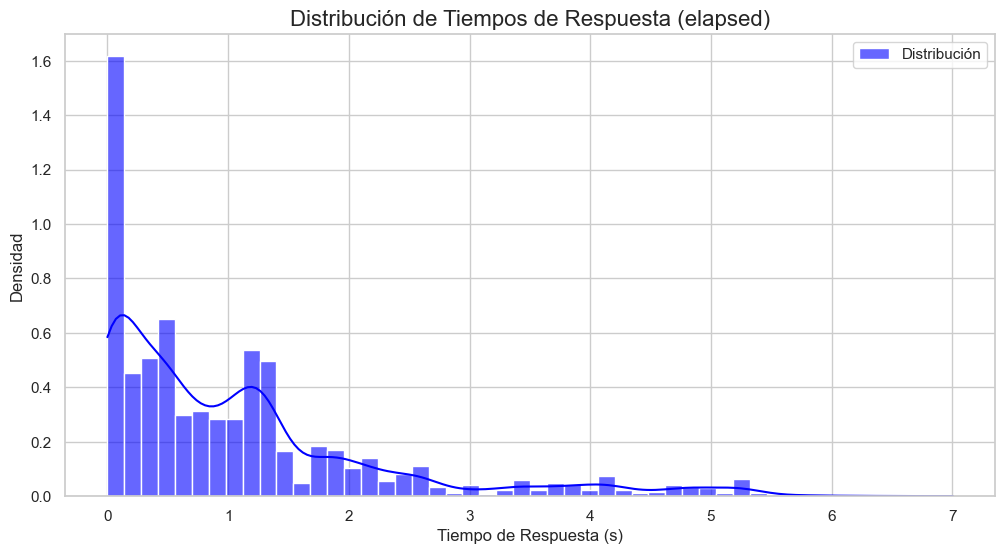

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- La mayoria de respuestas se dan en menos de 2 segundos.
- La mayoria de los tiempos de respuesta son bajos, pero hay algunos tiempos de respuesta entre 3 y y 6 segundos.

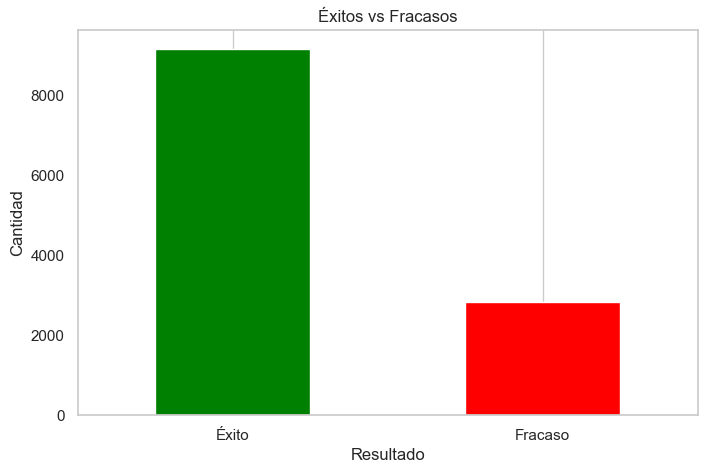

In [34]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 75% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

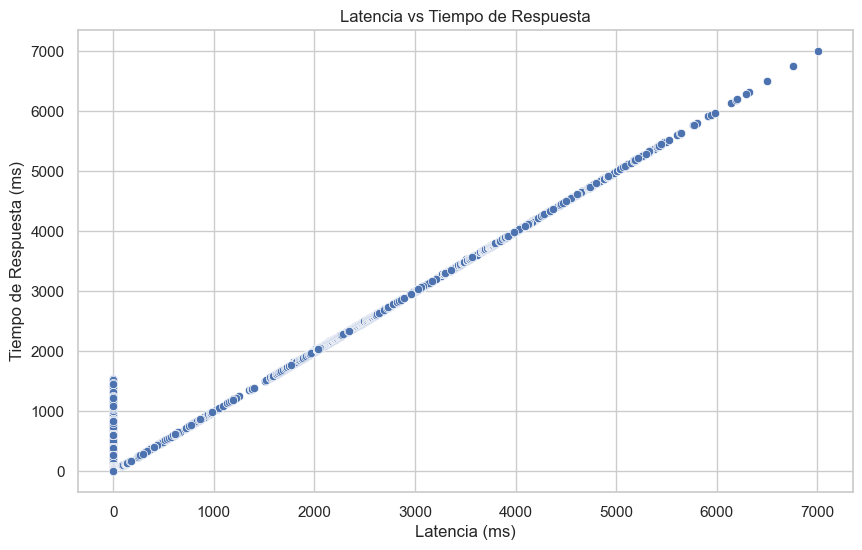

In [35]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1500ms aproximadamente.

In [ ]:
data = pd.read_csv("./v4/añadir_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733088360155,1,Añadir Opinion,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-207,text,False,NaN,2595,0,209,209,http://127.0.0.1:8081/api/opiniones/agregar,0,0,1
1,1733088360155,1,Añadir Opinion,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-205,text,False,NaN,2595,0,209,209,http://127.0.0.1:8081/api/opiniones/agregar,0,0,0
2,1733088360156,0,Añadir Opinion,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-208,text,False,NaN,2595,0,215,215,http://127.0.0.1:8081/api/opiniones/agregar,0,0,0
3,1733088360156,0,Añadir Opinion,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-206,text,False,NaN,2595,0,216,216,http://127.0.0.1:8081/api/opiniones/agregar,0,0,0
4,1733088360156,1,Añadir Opinion,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-209,text,False,NaN,2595,0,220,220,http://127.0.0.1:8081/api/opiniones/agregar,0,0,0


#### Al añadir una opinión

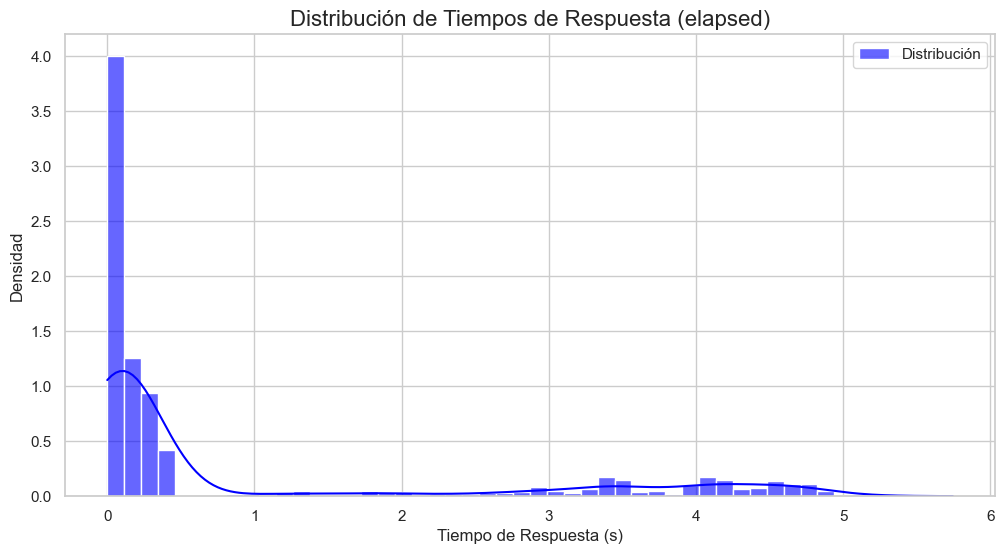

In [37]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

La mayor parte de respuestas se dan en menos de un segundo, pero se tiene algunas que tardan entre 3 y 5 segundos.

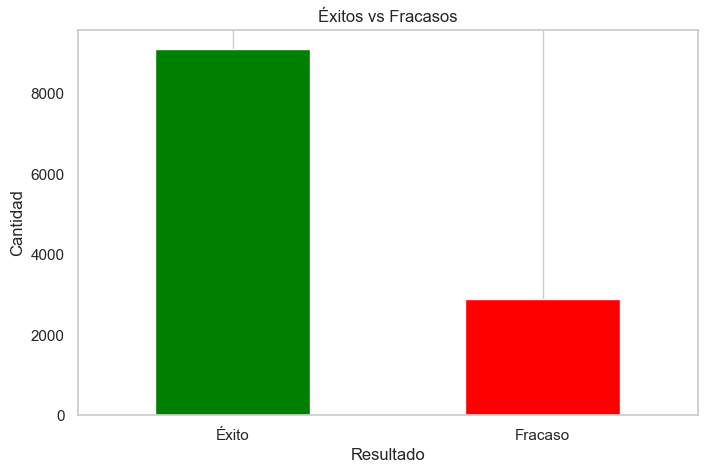

In [38]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 75% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

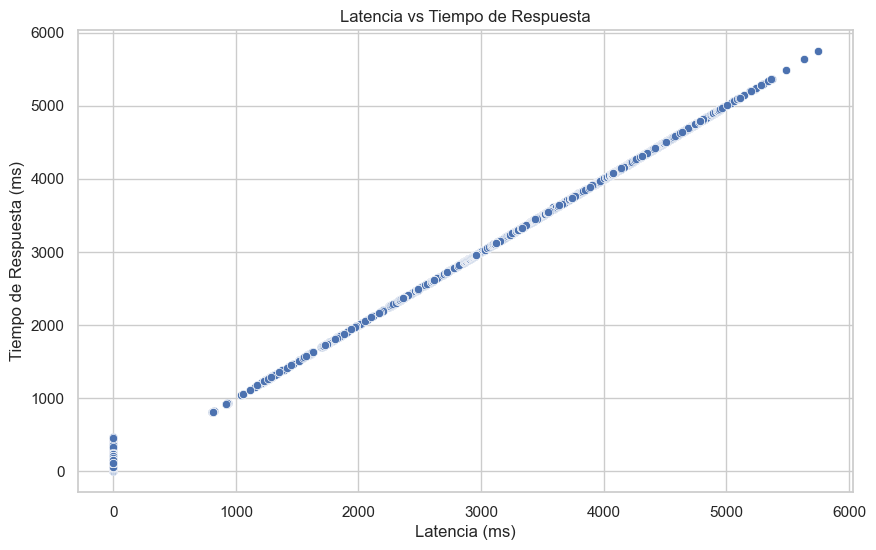

In [39]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [ ]:
data = pd.read_csv("./v4/editar_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733089469254,726,Editar Opinion,200,NaN,Thread Group 1-5,text,True,NaN,1376,397,1181,1181,http://127.0.0.1:8081/api/opiniones/editar,725,0,1
1,1733089469257,723,Editar Opinion,200,NaN,Thread Group 1-7,text,True,NaN,1376,397,1181,1181,http://127.0.0.1:8081/api/opiniones/editar,722,0,1
2,1733089469254,726,Editar Opinion,200,NaN,Thread Group 1-2,text,True,NaN,1376,397,1181,1181,http://127.0.0.1:8081/api/opiniones/editar,725,0,1
3,1733089469257,724,Editar Opinion,200,NaN,Thread Group 1-8,text,True,NaN,1376,397,1181,1181,http://127.0.0.1:8081/api/opiniones/editar,722,0,1
4,1733089469259,722,Editar Opinion,200,NaN,Thread Group 1-11,text,True,NaN,1376,397,1181,1181,http://127.0.0.1:8081/api/opiniones/editar,721,0,0


#### Al editar una opinión

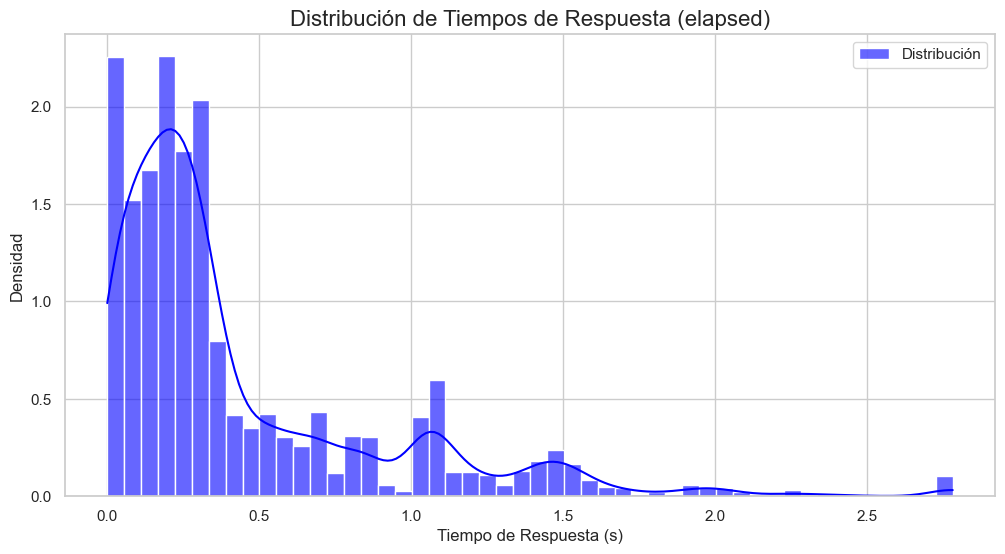

In [41]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

Gran parte de las peticiones se atienden el el primer segundo.

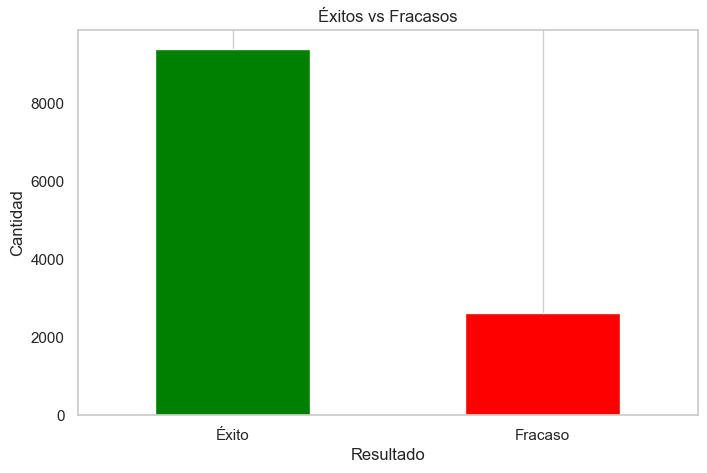

In [42]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 0.81% de las solicitudes están siendo procesadas correctamente.

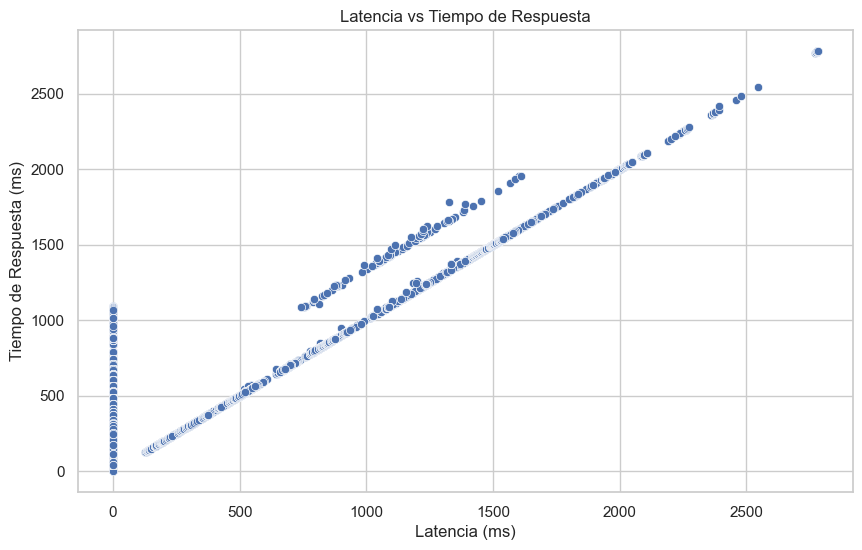

In [43]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 Al principio cuando hay 0 latencia el tiempo de respuesta es de un segundo, luego va aumentando proporcionalmente a la latencia.

In [ ]:
data = pd.read_csv("./v4/listar_inmuebles_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733108862895,184,Listar Inmueble,200,NaN,Thread Group 1-11,text,True,NaN,6863,134,86,86,http://127.0.0.1:8081/api/inmuebles/list,182,0,0
1,1733108862896,183,Listar Inmueble,200,NaN,Thread Group 1-13,text,True,NaN,6863,134,86,86,http://127.0.0.1:8081/api/inmuebles/list,160,0,1
2,1733108862882,199,Listar Inmueble,200,NaN,Thread Group 1-1,text,True,NaN,6863,134,84,84,http://127.0.0.1:8081/api/inmuebles/list,194,0,1
3,1733108862882,199,Listar Inmueble,200,NaN,Thread Group 1-4,text,True,NaN,6863,134,83,83,http://127.0.0.1:8081/api/inmuebles/list,174,0,1
4,1733108862902,179,Listar Inmueble,200,NaN,Thread Group 1-124,text,True,NaN,6863,134,83,83,http://127.0.0.1:8081/api/inmuebles/list,153,0,0


#### Al listar los inmuebles

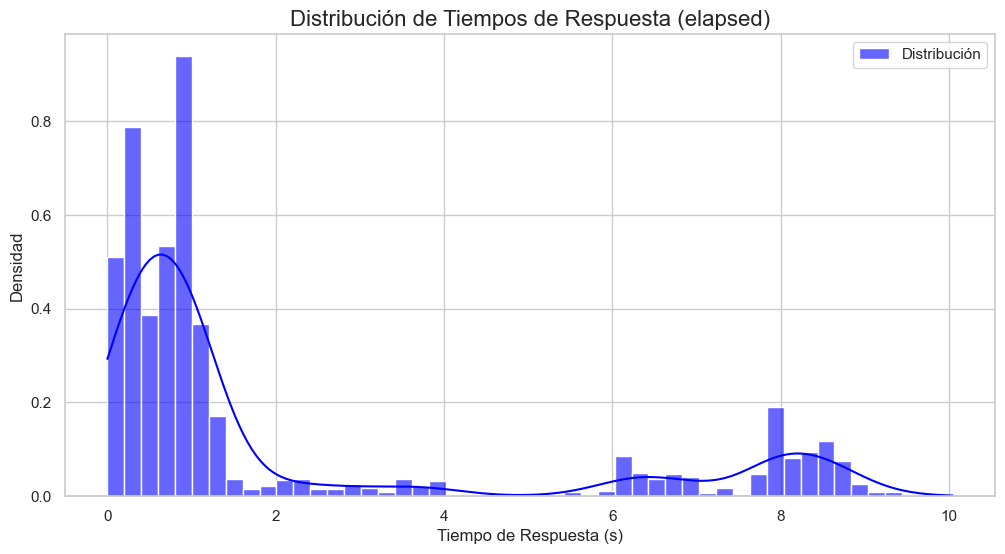

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

En los dos primeros segundos se atienden una gran parte de peticiones, pero en el intervalo de 2 a 6 segundos esa cantidad disminuye y a pesar de que el tiempo de respuesta es alto, no se atienden muchas peticiones.Se observa problemas de rendimiento al tardar de 6 a 10 segundos en responder gran parte de las peticiones.

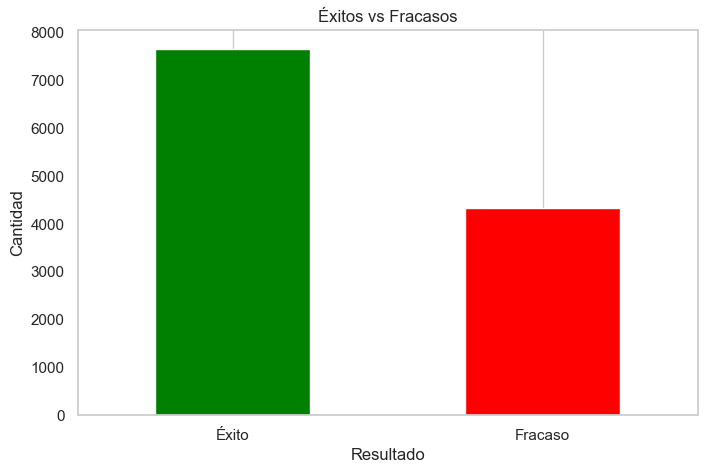

In [52]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 62% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando

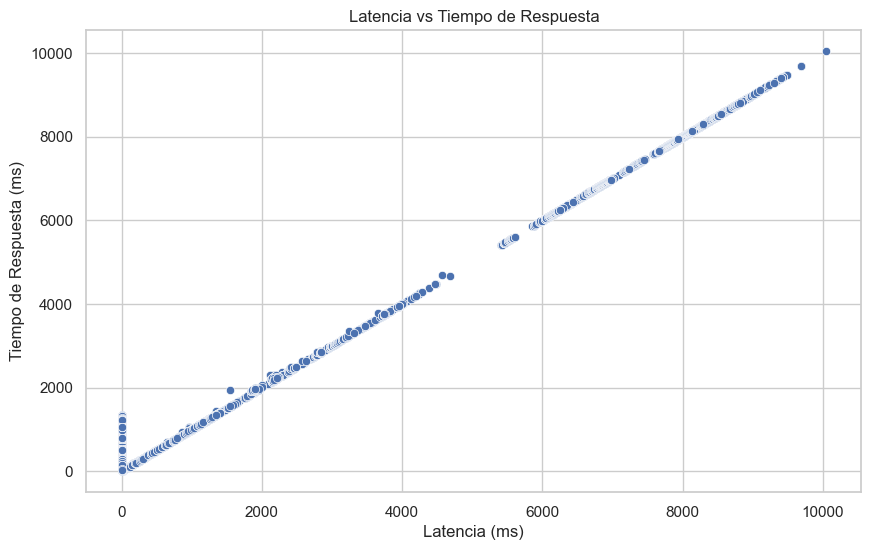

In [53]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [ ]:
data = pd.read_csv("./v4/lista_opinion_inmueble_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733109472670,1494,Obtener Opinion por Inmueble,200,NaN,Thread Group 1-97,text,True,NaN,1311,193,1132,1132,http://127.0.0.1:8081/api/opiniones/inmuebles,1494,0,1
1,1733109472839,1328,Obtener Opinion por Inmueble,200,NaN,Thread Group 1-155,text,True,NaN,1311,193,1176,1176,http://127.0.0.1:8081/api/opiniones/inmuebles,1328,0,0
2,1733109472672,1495,Obtener Opinion por Inmueble,200,NaN,Thread Group 1-100,text,True,NaN,1311,193,1176,1176,http://127.0.0.1:8081/api/opiniones/inmuebles,1495,0,1
3,1733109472958,1209,Obtener Opinion por Inmueble,200,NaN,Thread Group 1-176,text,True,NaN,1311,193,1176,1176,http://127.0.0.1:8081/api/opiniones/inmuebles,1209,0,1
4,1733109472546,1621,Obtener Opinion por Inmueble,200,NaN,Thread Group 1-48,text,True,NaN,1311,193,1176,1176,http://127.0.0.1:8081/api/opiniones/inmuebles,1621,0,10


#### Al listar las opiniones de un inmueble

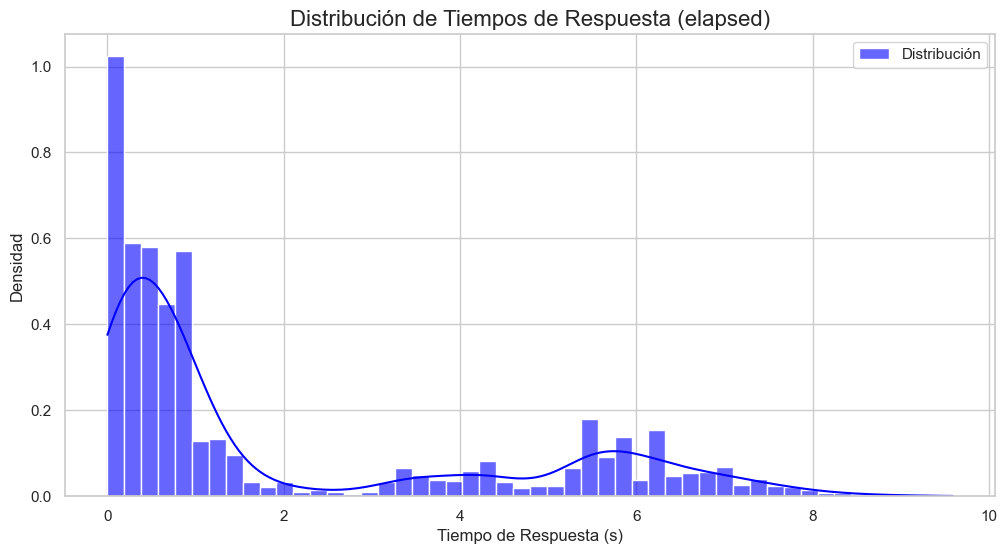

In [60]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

- Se observa una variabilidad en el rendimiento 
- Se responden gran parte de las peticiones en menos de 2 segundos pero también hay una proporción considerable que tarda más de 3 segundos.

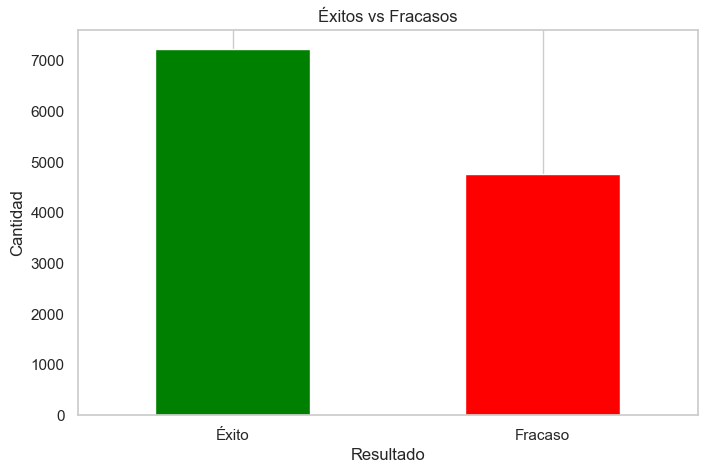

In [61]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 58% de las solicitudes están siendo procesadas correctamente, indicando que una proporción considerable no están obteniendo respuestas exitosas.

In [ ]:
data = pd.read_csv("./v4/lista_opinion_usuario_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733089737512,39,Obtener Opinion por Usuario,200,NaN,Thread Group 1-30,NaN,True,NaN,210,250,114,114,http://127.0.0.1:8081/api/opiniones/usuario,39,0,0
1,1733089737504,48,Obtener Opinion por Usuario,200,NaN,Thread Group 1-7,NaN,True,NaN,210,250,113,113,http://127.0.0.1:8081/api/opiniones/usuario,48,0,1
2,1733089737513,40,Obtener Opinion por Usuario,200,NaN,Thread Group 1-36,NaN,True,NaN,210,250,112,112,http://127.0.0.1:8081/api/opiniones/usuario,40,0,0
3,1733089737512,42,Obtener Opinion por Usuario,200,NaN,Thread Group 1-34,NaN,True,NaN,210,250,111,111,http://127.0.0.1:8081/api/opiniones/usuario,42,0,1
4,1733089737513,41,Obtener Opinion por Usuario,200,NaN,Thread Group 1-37,NaN,True,NaN,210,250,110,110,http://127.0.0.1:8081/api/opiniones/usuario,41,0,0


#### Al listar las opiniones realizadas por un usuario

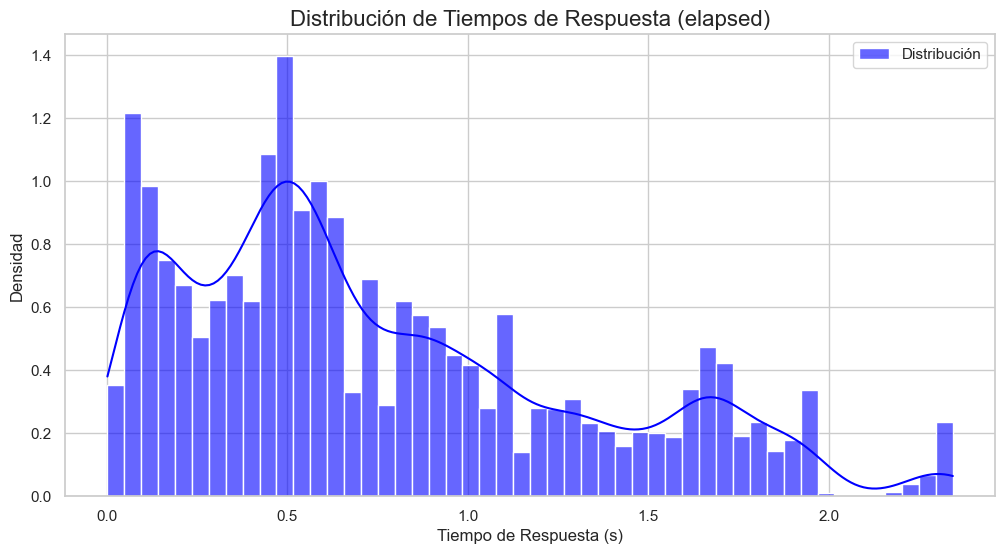

In [63]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

La mayor parte de las peticiones se están respondiendo de 0 a 2 segundos, indicando un rendimiento más constante.

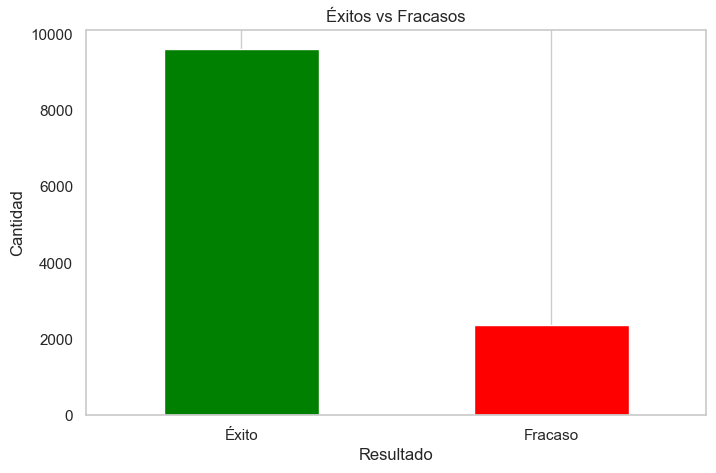

In [64]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 81% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

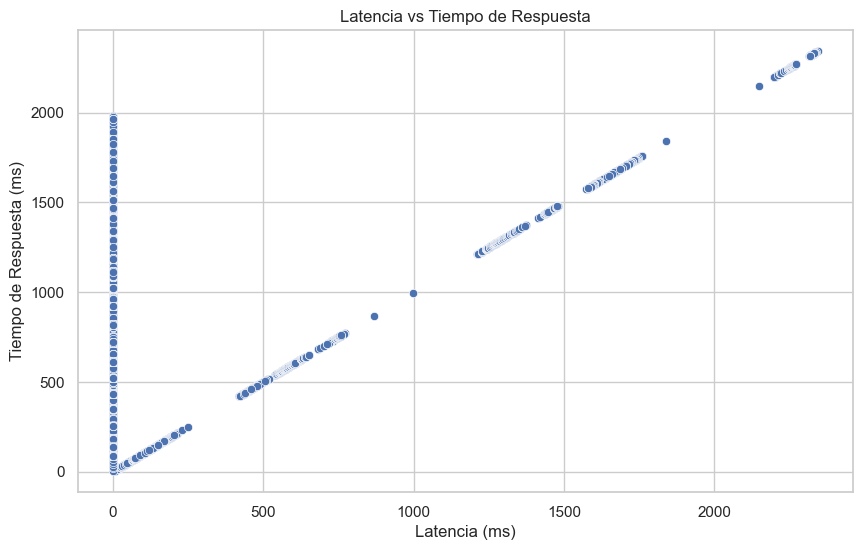

In [65]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

Cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 2000ms aproximadament a partir de que la latencia aumenta también lo hace el tiempo de respuesta.